# Data Science And Business Analytics Intern At
# GRIP @ The Sparks Foundation
## Author :- Vedant Lotia
### Task 2 :- Prediction Using Unsupervised ML
### Problem Statement :- From the given ‘Iris’ dataset, predict the optimum number of clusters and represent it visually.

In [2]:
#Importing all required libraries:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
#Importing and reading the dataset using csv file:
iris = pd.read_csv("C:\\Users\\HP\\Desktop\\Iris.csv")
iris.head(5)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [9]:
#Checking information of the dataset:

iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [4]:
#Describe the dataset:

iris.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


#### Now we select all four features (sepal length, sepal width, petal length, and petal width) of the dataset in a variable called x so that we can train our model with these features. For this, we use the iloc function on df, and the column index (0,1,2,3) for the above four columns are used

In [5]:
x = iris.iloc[:,[1,2,3,4]].values

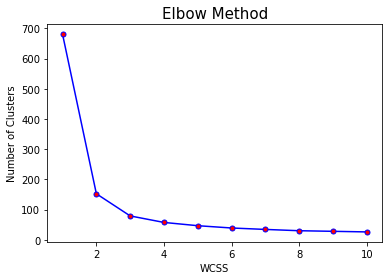

In [6]:
#Implementing Kmeans clustering algorithm:
from sklearn.cluster import KMeans
wcss = []

for i in range(1,11):
    kmeans=KMeans(n_clusters = i, init = "k-means++", max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
    
plt.plot(range(1,11),wcss,'blue', marker='.',markersize = 10, markerfacecolor='red')
plt.title("Elbow Method", fontsize = '15')
plt.xlabel("WCSS", fontsize = '10')
plt.ylabel("Number of Clusters", fontsize = '10')
plt.show()

#### You can clearly see why it is called 'The elbow method' from the above graph, the optimum clusters is where the elbow occurs. This is when the within cluster sum of squares (WCSS) doesn't decrease significantly with every iteration.As you can see, the optimal value of k is between 2 and 4, as the elbow-like shape is formed at k=3 in the above graph.

In [7]:
#Creating the Kmeans classifier using K=3:
kmeans = KMeans(n_clusters = 3, max_iter = 300, n_init = 10, init = "k-means++")
y_kmeans = kmeans.fit_predict(x)

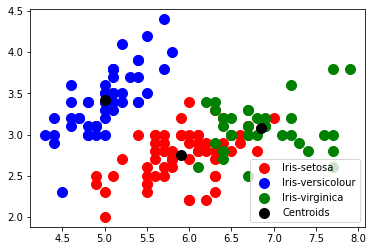

In [8]:
# Visualising the clusters - On the first two columns
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], 
            s = 100, c = 'red', label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], 
            s = 100, c = 'blue', label = 'Iris-versicolour')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1],
            s = 100, c = 'green', label = 'Iris-virginica')

# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], 
            s = 100, c = 'black', label = 'Centroids',)

plt.legend()
plt.show()

#### So here We have seen predicting number of clusters using kmeans algorithm and later represented them using above graph.

## THANK YOU